In [1]:
!pip install opendatasets

# Download Dataset From Kaggle.

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: elianishiyama
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification


100%|██████████| 69.3M/69.3M [00:00<00:00, 1.33GB/s]

# Import Required Libraries

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

from IPython.display import Image
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

# Specify File Paths for Each Dataset

In [17]:
train_path = 'birds-20-species-image-classification/train'
test_path = 'birds-20-species-image-classification/test'
valid_path = 'birds-20-species-image-classification/valid'

# Load Datasets with VGG16 Preprocessing

In [18]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=32, shuffle=True)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), shuffle=False)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), shuffle=False)

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


# Check Dataset Class Balance

Class Distribution for Training Dataset:
{'ABBOTTS BABBLER': np.int64(166), 'ABBOTTS BOOBY': np.int64(180), 'ABYSSINIAN GROUND HORNBILL': np.int64(179), 'AFRICAN CROWNED CRANE': np.int64(137), 'AFRICAN EMERALD CUCKOO': np.int64(154), 'AFRICAN FIREFINCH': np.int64(137), 'AFRICAN OYSTER CATCHER': np.int64(155), 'AFRICAN PIED HORNBILL': np.int64(187), 'AFRICAN PYGMY GOOSE': np.int64(179), 'ALBATROSS': np.int64(133), 'ALBERTS TOWHEE': np.int64(161), 'ALEXANDRINE PARAKEET': np.int64(165), 'ALPINE CHOUGH': np.int64(166), 'ALTAMIRA YELLOWTHROAT': np.int64(150), 'AMERICAN AVOCET': np.int64(179), 'AMERICAN BITTERN': np.int64(170), 'AMERICAN COOT': np.int64(158), 'AMERICAN FLAMINGO': np.int64(164), 'AMERICAN GOLDFINCH': np.int64(133), 'AMERICAN KESTREL': np.int64(155)}


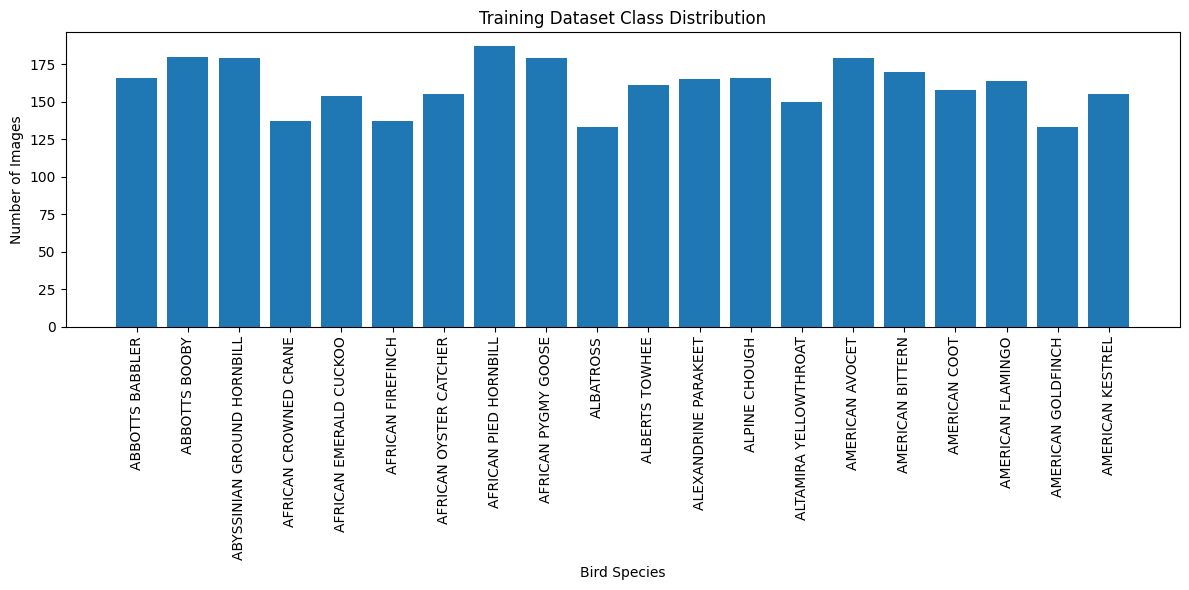

In [19]:
# Get the class indices and counts for the training data
class_indices = train_batches.class_indices
class_names = list(class_indices.keys())
class_counts = train_batches.labels
unique_classes, counts = np.unique(class_counts, return_counts=True)

# Map class indices back to class names
class_distribution = dict(zip([class_names[i] for i in unique_classes], counts))
print("Class Distribution for Training Dataset:")
print(class_distribution)

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xticks(rotation=90)
plt.xlabel("Bird Species")
plt.ylabel("Number of Images")
plt.title("Training Dataset Class Distribution")
plt.tight_layout()
plt.show()

# Fine-Tune VGG16 for Bird Classification

In [20]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers first
for layer in vgg16_model.layers:
    layer.trainable = False

# Unfreeze last block (block5)
for layer in vgg16_model.layers[-4:]:
    layer.trainable = True

model = Sequential([
    vgg16_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(units=len(train_batches.class_indices), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=1)

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 26s 226ms/step - accuracy: 0.1299 - loss: 3.9450 - val_accuracy: 0.6900 - val_loss: 1.1292
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.6337 - loss: 1.2059 - val_accuracy: 0.9500 - val_loss: 0.1755
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.8716 - loss: 0.4295 - val_accuracy: 0.9800 - val_loss: 0.0882
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.9460 - loss: 0.1876 - val_accuracy: 0.9700 - val_loss: 0.0758
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.9532 - loss: 0.1414 - val_accuracy: 0.9500 - val_loss: 0.0979
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.9831 - loss: 0.0595 - val_accuracy: 0.9900 - val_loss: 0.0338
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.9820 - loss: 0.0628 - val_accuracy: 0.9800 - val_loss: 0.0721
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.9876 - loss: 0

# Plot Training History

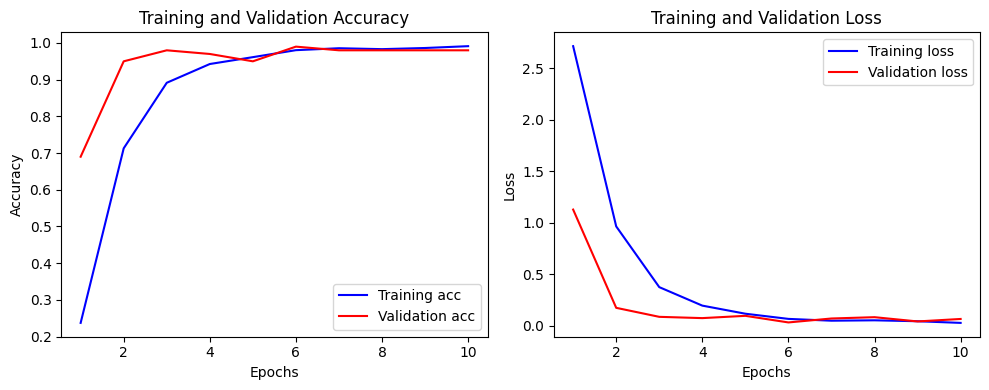

In [21]:
# Extract data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate Test Accuracy

In [22]:
loss, accuracy = model.evaluate(test_batches, verbose=1)
print(f"\nTest Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 1.0000 - loss: 0.0042

Test Accuracy: 1.0000


# Generate Classification Report

In [23]:
predictions = model.predict(x=test_batches, verbose=1)

test_labels = test_batches.classes

print("\nClassification Report:")

print(classification_report(test_labels, predictions.argmax(axis=1), target_names=test_batches.class_indices.keys()))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step

Classification Report:
                            precision    recall  f1-score   support

           ABBOTTS BABBLER       1.00      1.00      1.00         5
             ABBOTTS BOOBY       1.00      1.00      1.00         5
ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
     AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
    AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
         AFRICAN FIREFINCH       1.00      1.00      1.00         5
    AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
     AFRICAN PIED HORNBILL       1.00      1.00      1.00         5
       AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                 ALBATROSS       1.00      1.00      1.00         5
            ALBERTS TOWHEE       1.00      1.00      1.00         5
      ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
             ALPINE CHOUGH       1.00      1.00     

# Plot Confusion Matrix

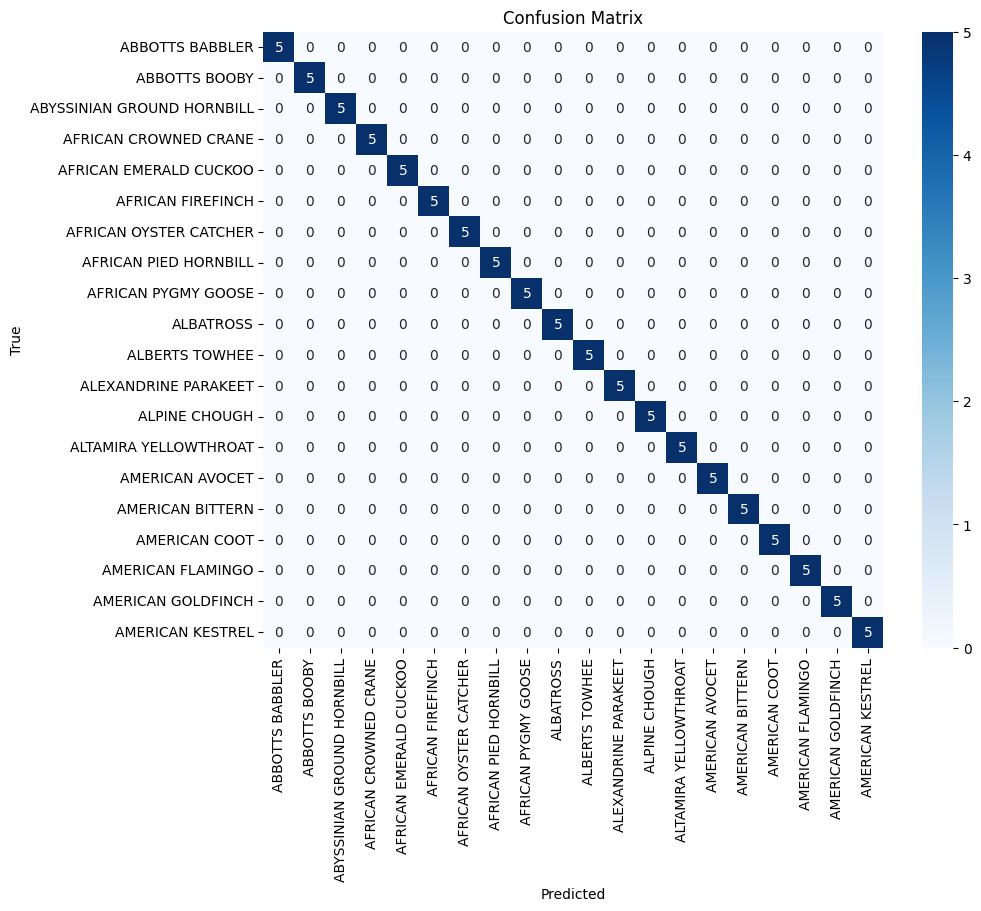

In [24]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_batches.class_indices.keys(), yticklabels=test_batches.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curves for Each Class

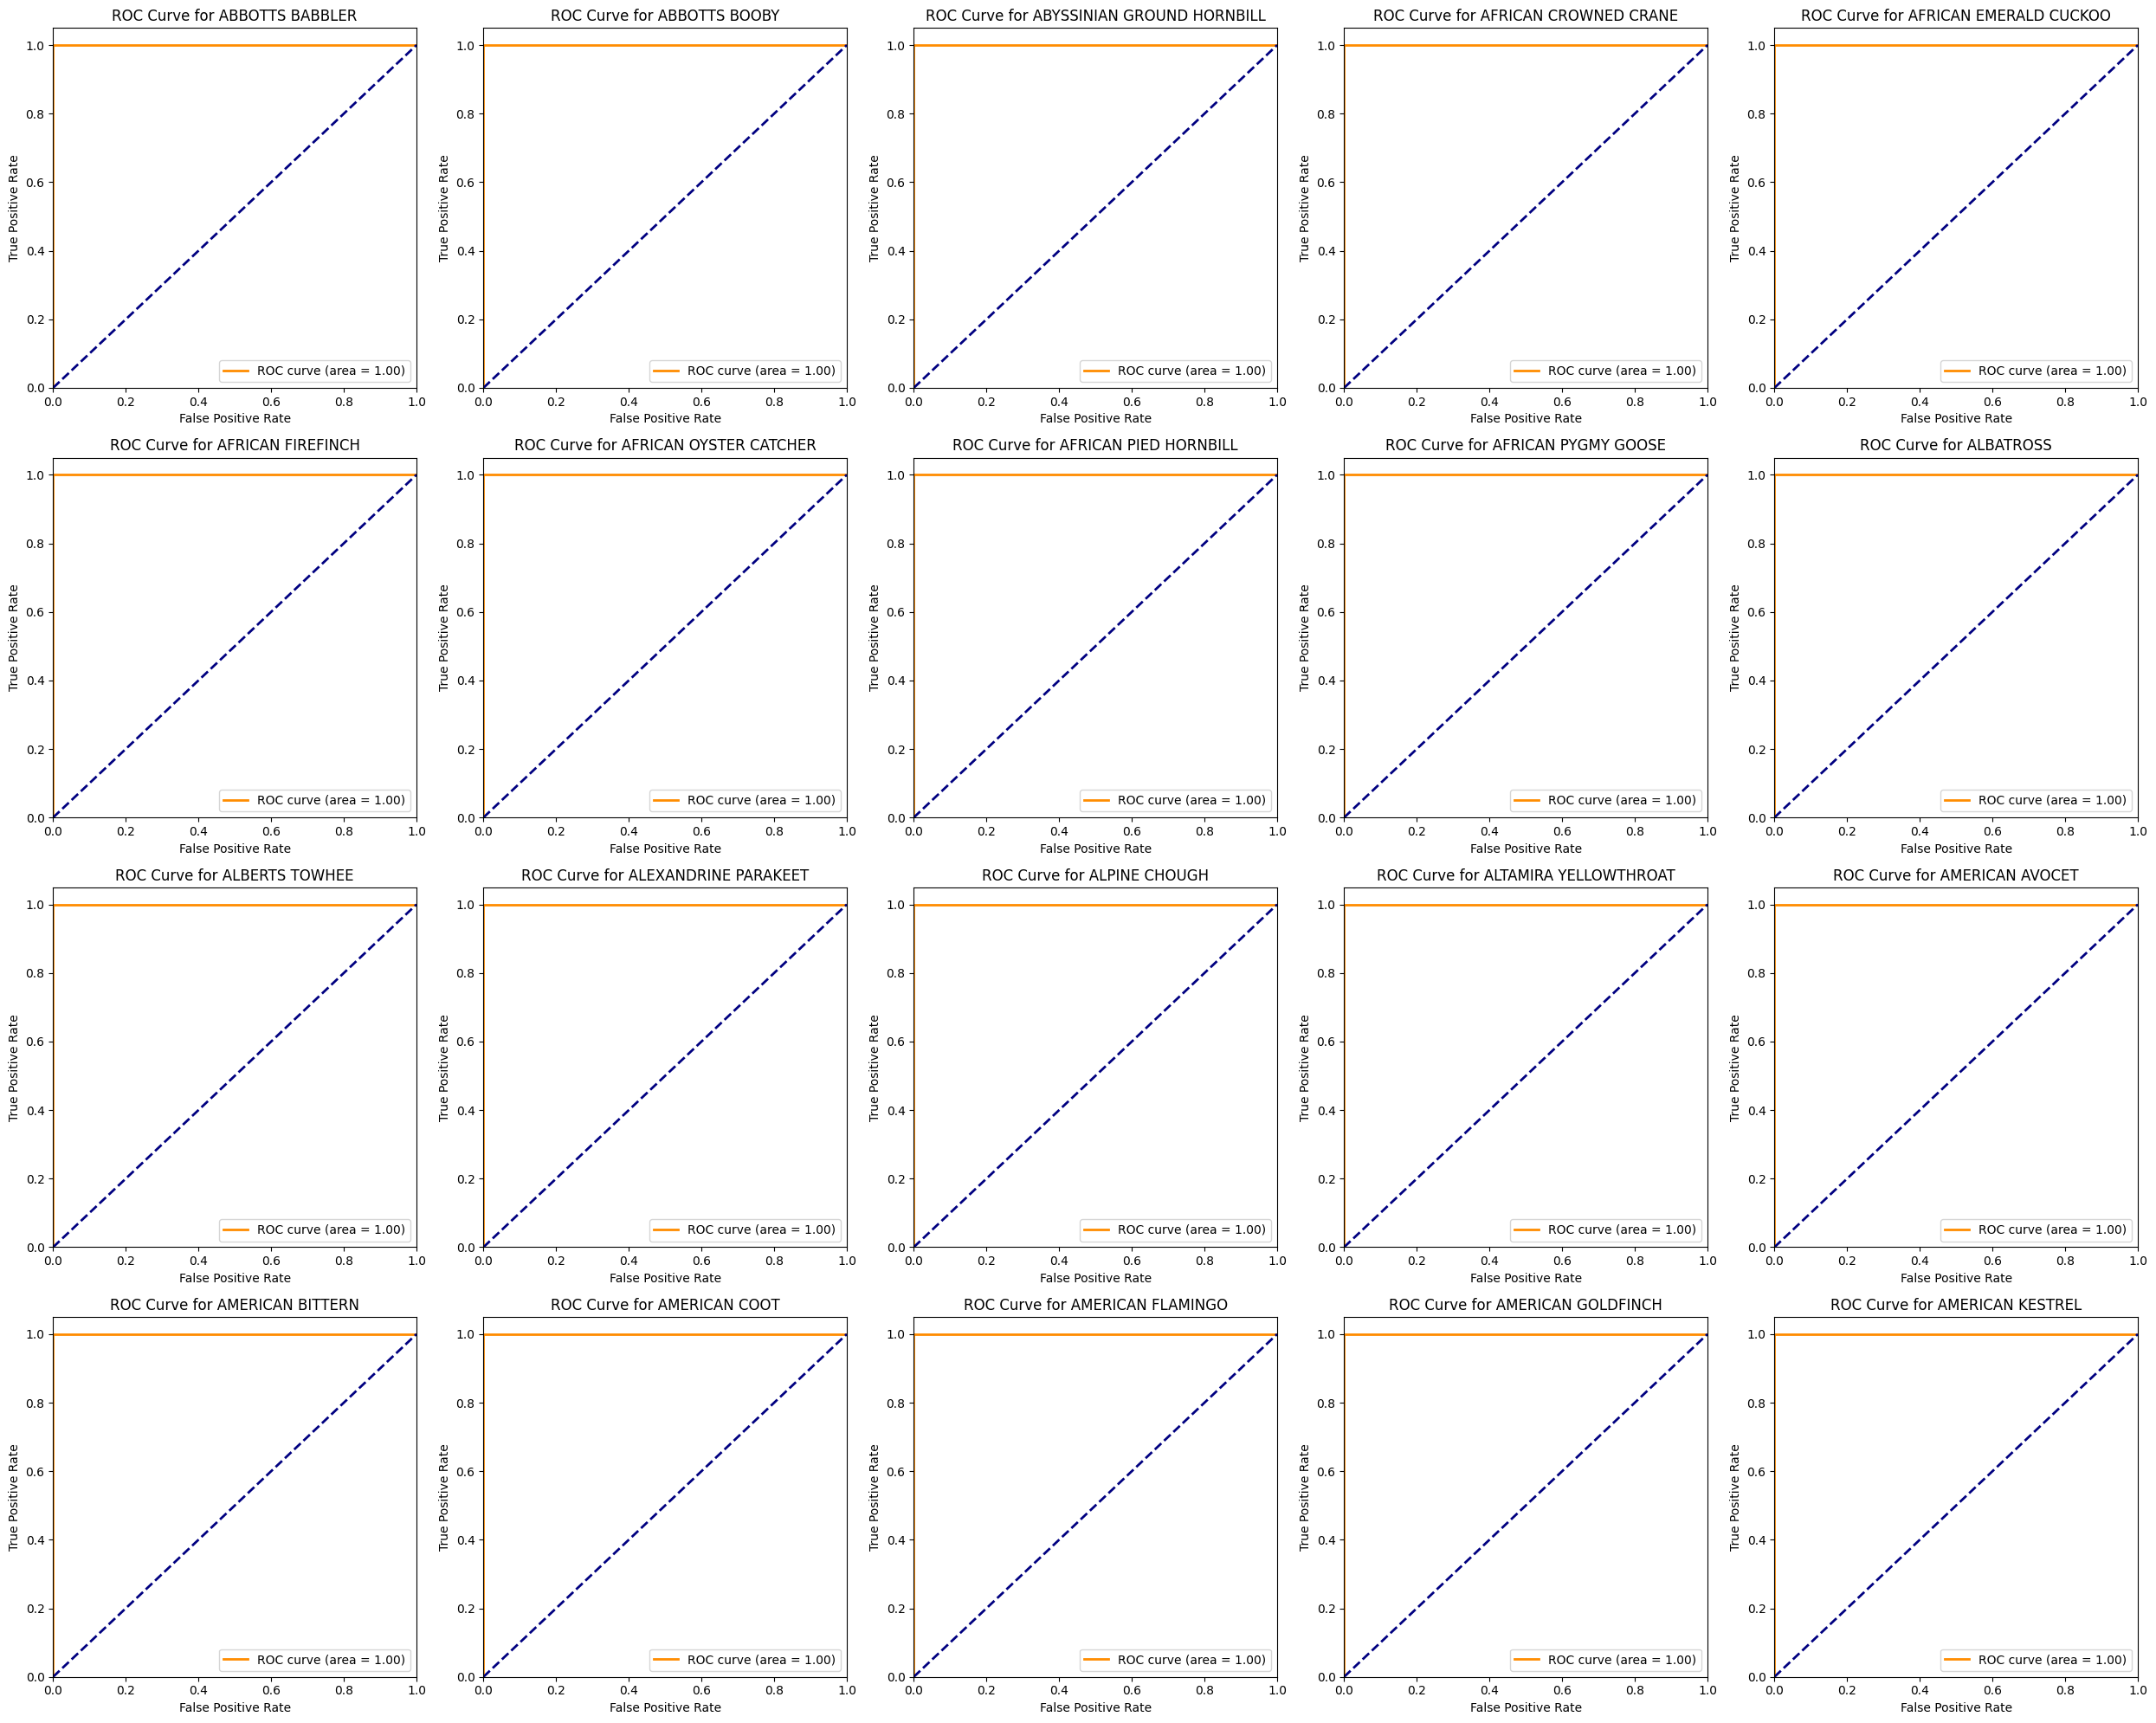

In [25]:
n_classes = len(test_batches.class_indices)
labels = list(test_batches.class_indices.keys())

# Determine grid size
n_cols = 5  # You can adjust the number of columns
n_rows = (n_classes + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i in range(n_classes):
    plt.subplot(n_rows, n_cols, i + 1)

    # Get true labels for class i
    y_true = (test_labels == i).astype(int)
    # Get predicted probabilities for class i
    y_scores = predictions[:, i]

    # Compute ROC curve and ROC area for class i
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {labels[i]}')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# VGG16 Base Model Architecture

In [26]:
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

# Complete Model Architecture

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,904,318 (110.26 MB)

 Trainable params: 7,089,684 (27.04 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 14,179,370 (54.09 MB)

# Complete Model Architecture - Graphical Representation

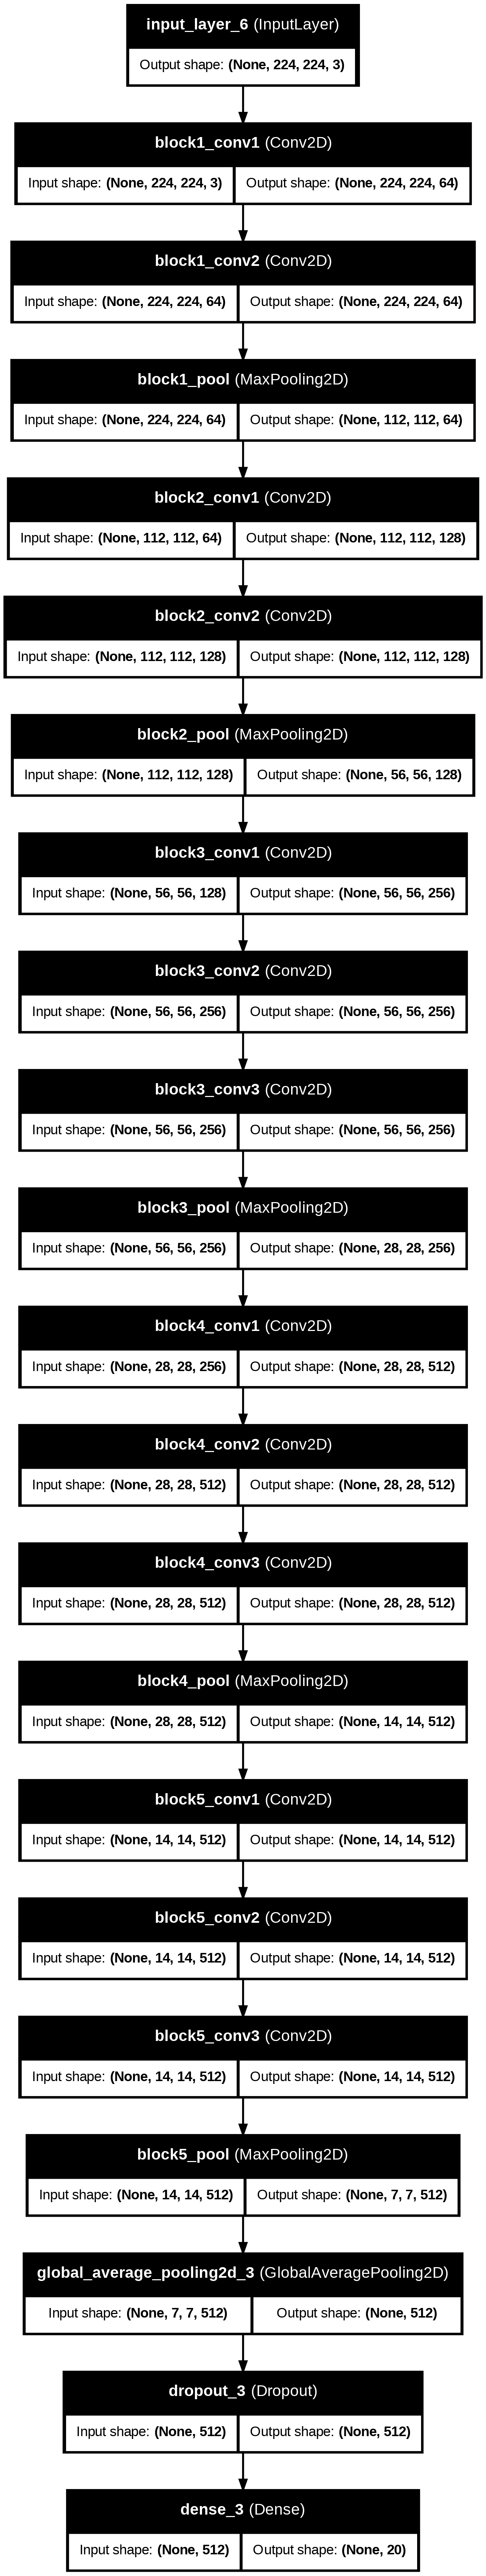

In [28]:
# Load base model with pretrained weights
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Custom head on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_batches.class_indices), activation='softmax')(x)

model_graph = Model(inputs=base_model.input, outputs=outputs)

plot_model(model_graph, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
Image(filename='model_architecture.png')

# Save the model

In [33]:
model.save('bird_classifier.keras')

# Load the model

In [34]:
model_saved = tf.keras.models.load_model('bird_classifier.keras')

# Making Predictions

In [35]:
def predict_and_display(img_path, model):

    """
    Predicts the class of a single image and displays it with the predicted label and confidence.

    Args:
        img_path (str): Path to the image file.
        model: Trained Keras model.
    """

    class_indices = {'ABBOTTS BABBLER': 0,
                     'ABBOTTS BOOBY': 1,
                     'ABYSSINIAN GROUND HORNBILL': 2,
                     'AFRICAN CROWNED CRANE': 3,
                     'AFRICAN EMERALD CUCKOO': 4,
                     'AFRICAN FIREFINCH': 5,
                     'AFRICAN OYSTER CATCHER': 6,
                     'AFRICAN PIED HORNBILL': 7,
                     'AFRICAN PYGMY GOOSE': 8,
                     'ALBATROSS': 9,
                     'ALBERTS TOWHEE': 10,
                     'ALEXANDRINE PARAKEET': 11,
                     'ALPINE CHOUGH': 12,
                     'ALTAMIRA YELLOWTHROAT': 13,
                     'AMERICAN AVOCET': 14,
                     'AMERICAN BITTERN': 15,
                     'AMERICAN COOT': 16,
                     'AMERICAN FLAMINGO': 17,
                     'AMERICAN GOLDFINCH': 18,
                     'AMERICAN KESTREL': 19
                     }

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    confidence = prediction[0][predicted_index] * 100

    # Get label from class_indices
    labels = list(class_indices.keys())
    predicted_label = labels[predicted_index]

    # Display image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    return predicted_label, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step


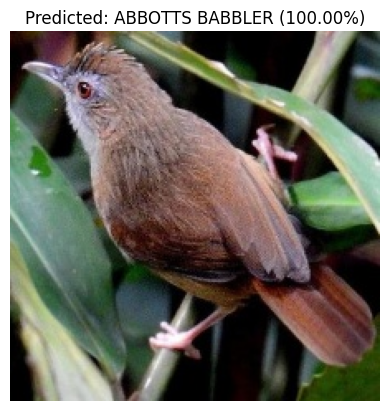

('ABBOTTS BABBLER', np.float32(99.99509))

In [36]:
img_path = 'birds-20-species-image-classification/test/ABBOTTS BABBLER/1.jpg'
predict_and_display(img_path, model_saved)